<a href="https://colab.research.google.com/github/vmasjuan/covid-19/blob/master/Covid_19_SEIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelamiento del Coronavirus

Autor [Victor Masjuan](https://www.linkedin.com/in/victormasjuan/).

Agradezco la orientación de mi amiga [Andrea Basagoitía](https://www.linkedin.com/in/abasagoitia/), PhD, por su orientación y contribución para entender el fenómeno.

Basado en el artículo "Social Distancing to Slow the Coronavirus", [Christian Hubbs](https://towardsdatascience.com/@christiandhubbs). Publicación original en [https://towardsdatascience.com/](https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296)

**El propósito de este repositorio es experimentar con las ecuaciones del Modelo SEIR para ilustrar un posible comportamiento del Covid-19, como también el efecto del distanciamiento social. No tiene propósito de ser exacto o predecir la evolución de la pandemia, por lo que no se debe entender los valores como reales ni sirven para toma de decisiones.** Para ello se requiere un modelo más completo y calibrarlo con los datos observados. He modificado el texto y código considerando también otros artículos.

## Introducción

El COVID-19se ha extendido rápidamente por todo el mundo. Países como Italia y España han enfrentado lo peor de la Pandemia. Corea del Sur ha sido un ejemplo en la lucha contra el virus aplicando alta tasa de test de detección y asegurando un distanciamiento social. En Chile estamos enfrentando la pandemia en su etapa inicial, se augura tímidamente que las medidas de aislamiento y detección de casos ha logrado tener un brote menos abrupto a Italia y España. Chile tiene la oportunidad de mirar al futuro y nutrirse de la experiencia en Asia y Europa, preparando el sistema de salud y lugares temporales de atención, siguiendo las recomendaciones de la OMS ([WHO](https://www.who.int/es)). Para no colapsar la infraestructura es fundamental lo que se ha denominado aplanar la curva siendo el **distanciamiento social** la medida por escelencia.

La idea es reducir los contactos entre las personas, de manera de postergar y disminuir el peak de casos para no sobrepasar la capacidad de atención de salud, especialmente de los casos más graves que requieran no sólo hospitalción sino que equipos de ventilación. El gráfico a continuación ilustra esta idea.

![texto alternativo](https://www.fast.ai/images/coronavirus/image3.jpeg)
Flattening the curve to keep infection manageable (Source: [Fast.ai](https://www.fast.ai/2020/03/09/coronavirus/))

---

## Estimación en base al Modelo SEIR

El modelo SEIR es un modelo compartimental que muestra como se propaga una enfermedad en la población. SEIR es un acronismo para **Susceptible, Expuesto, Infectado, Recuperado**. Cuando una infección se introduce en una poplación, las personas se muevem de una de estas clases (o compartimientos) al próximo. Cuando alcanzan el estado **R**, se asume que no serán infectados nuevamente (sobreviven y se hacen inmunes o fallecen sucumbiendo a la enfermedad).

<font color="green">Nota: Un término más apropiado es **R**emovidos, ya que considera los recuperados más los fallecidos producto de la epidemia.</font>

El modelo es el siguiente (ver [Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)):

$$ \dot{S} = \lambda N - \mu S - \beta\frac{S}{N} I \tag{1} $$

$$ \dot{E} = \beta\frac{S}{N} I - (\alpha +\mu) E \tag{2} $$

$$ \dot{I} = \alpha E - (\gamma + \mu) I \tag{3} $$

$$ \dot{R} = \gamma I - \mu R \tag{4} $$

$$ N = S + E + I + R \tag{5} $$

Tenemos un sistema de cuatro ecuaciones diferenciales, con cinco parámetros parámetros: $\alpha, \beta, \gamma, \lambda$ y $\mu$.

*   $\alpha^{-1}$ es período de incubación $t_{incubacion}$

*   $\beta$ es la tasa promedio de contacto de la proporción de la población que se infecta ${t_{contacto}}*{t_{contagio}}$

*   $\gamma^{-1}$ período hacerse contagioso $t_{infeccioso}$

*   $\lambda$ es la tasa de nacimieto y $\mu$ la tasa de mortalidad. que se suponen iguales, i.e. **N** es constante.

Suponiendo $\lambda = \mu = 0$, las ecuaciones se pueden simplificar a:

$$ \dot{S} = - {t_{contacto}}*{t_{contagio}} \frac{S}{N} I \tag{1} $$

$$ \dot{E} = {t_{contacto}}*{t_{contagio}} \frac{S}{N} I - \frac{E}{t_{incubacion}} \tag{2} $$

$$ \dot{I} = \frac{E}{t_{incubacion}} - \frac{I}{t_{infeccioso}} \tag{3} $$

$$ \dot{R} = \frac{I}{t_{infeccioso}} \tag{4} $$

$$ N = S + E + I + R \tag{5} $$

1.   El cambio en las personas susceptibles a la enfermedad $\dot{S}$ va disminuyendo proporcionalmente al contacto con la proporción de personas que se infectan $\beta\frac{S}{N}I$.

2.   La tasa de Exposición $\dot{E}$ aumenta con el contacto con la proporción de personas que se infectan $\beta \frac{S}{N}I$ y disminuye proporcionalmente a los infectado $\alpha E$.

3.   El cambio en las personas infectadas es proporcional a las personas expuestas $\alpha E$ y disminuye proporcionalmente a la cantidad de personas infectadas $\gamma I$.

4.   La tasa de removidos es proporcional a la cantidad de infectados $\gamma I$.

5.   Indica que el total de la población no cambia, sin efecto de migración y considerando la tasa de mortalidad $\mu$ igual a la tasa de nacimientos $\lambda$ (también escrito como $\Lambda = \lambda N$). Se asume $\lambda = \mu =0$ para efectos de esta simulación.

##Distanciamiento Social

El distanciamiento social procura evitar aglomeraciones, disminuir cantidad de contactos físicos y otros esfuerzos para mitigar la propagación de la enfermedad infecciosa. De acuerdo al modelo, se impacta la tasa de contacto β incorporando un factor ρ de efectividad de las medidas de distanciamiento.

El valor ρ es un término constante entre 0 y 1, donde 0 indica aislación total y en cuarentena, mientras que 1 es el modelo base sin intervención en la interacción social. Las ecuaciones (1) y (2) se expresan según las ecuaciones siguientes ponderando la tasa de contacto:

$$ \dot{S} = - {\rho * t_{contacto}}*{t_{contagio}} \frac{S}{N} I \tag{1} $$

$$ \dot{E} = {\rho * t_{contacto}}*{t_{contagio}} \frac{S}{N} I - \frac{E}{t_{incubacion}} \tag{2} $$

## Valor $R_0$

Un parámetro relevante es conocido como el valor $R_0$, que es el número de casos, en promedio, que causará una persona infectada durante su período infeccioso. Existe brote epidémico cuando es mayor a la unidad: $R_0 > 1$.

![texto alternativo](https://miro.medium.com/max/810/1*kc4-Bv2nzIvb9xG6ELHuzA.png)

Valores mayores de $R_0$ significan una enfermedad más infecciosa [HealthLine.com](https://www.healthline.com/health/r-nought-reproduction-number#conditions)

Este valor define cuan rápido la enfermedad se expande y está relacionado a los parámetros según la razón siguiente:

$$ R_0 = \frac{\alpha}{\alpha + \mu} \frac{\beta}{\gamma + \mu} \tag{6} $$

$$ \lambda = \mu = 0: R_0 = \frac{\beta}{\gamma} \tag{6} $$

Con la intervención por distanciamiento social, se mitiga el brote $R_{\rho} = \rho R_0$, si bien mientras $R_{\rho}$ sea mayor a 1.0 existirá brote epidémico, el efecto será menor.

Información adicional del parámetro $R_0$ y valores estimados para el Covid-19, ver [aquí](https://theconversation.com/r0-how-scientists-quantify-the-intensity-of-an-outbreak-like-coronavirus-and-predict-the-pandemics-spread-130777).

# Modelando el Coronavirus

Con las ecuaciones, se construye el modelo. la clave es determinar los valores para α, β, and γ para ver como se propaga, con y sin intervención social ρ.

*   Período de incubación $t_{incubacion}$ = 5.5 días promedio, i.e. $\alpha = 0.1818$

*   Período que infectado se aisla y no contagia $t_{infeccioso}$ = 2,25 días promedio, i.e. $\gamma = 0.4444$

*   Por ecuación (6), $ R_0 = (t_{contacto}*t_{contagio})*t_{infeccioso} = 2.35$, i.e. $\beta = 1.0444$

<font color="green">Nota: Estudios que he revisado estiman la incubación entre 2.2 y 11.5 días con una media de 5.1 días. Mientras que $R_0$ entre 1.5 y 3.5, valores que sirven para análisis de sensibilidad.</font>

# Modelo SEIR en Python

### Inicialización de Pyhton

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Resolviendo numéricamente las ecuaciones diferenciales por método de Euler, requiere tomar los valores recientes para S, E, I y R, añadiendo la ecuación multiplicado por el delta tiempo.

### Modelo en Pyhton

In [0]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    N = sum(init_vals)
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    Lambda, mu = 0, 0 # sin nacimientos, defunciones o migraciones poblacionales
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] + (Lambda*(N-S[-1]) - (rho*beta*S[-1]*I[-1]/N))*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1]/N - (alpha+mu)*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - (gamma+mu)*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1] - mu*R[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

Sean los valores en el sistema de ecuaciones diferenciales: S_0, E_0, I_0 y R_0 <font color="gray">(no confundir con $R_0$)</font>, y N el tamaño poblacional en el ejercicio.

<font color="green">Se simula para una población N = 1.000.000</font>

Entonces:

*   S_0 = N - E_0 - I_0 - R_0, población susceptible
*   E_0 = $(\frac{\gamma}{\alpha})$ * I_0, expuestos iniciales <font color="gray">(por ecuación 3, con $\lambda = \mu = 0$).</font>
*   I_0 = 100, infectados inciales (supone cierta simultaneidad de brote inicial)
*   R_0 = 0, sin recuperados

### Inicializando los parámetros y variables en Python

In [3]:
# Define parameters
t_max = 200
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 1000000
Ro = 2.35
t_incubacion = 5.5
t_infeccioso = 2.25

alpha = 1./t_incubacion
gamma = 1./t_infeccioso
beta = Ro * gamma

rho = 1. # factor de intervención social
params = alpha, beta, gamma, rho

R0 = 0 # ningún recuperado
I0 = 100 # infectados iniciales
E0 = round(I0 * gamma/alpha) # expuestos iniciales 
S0 = (N-E0-I0-R0) # suspectibles iniciales
init_vals = S0, E0, I0, R0 # (SEIR) se puede expresar total o unitario dividiendo por N.

print('Población = {p:.0f}, Susceptibles = {s:.0f}, Expuestos = {e:.0f}, Infectados = {i:.0f}, Removidos = {r:.0f}.'.format(p=N, s=S0, e=E0, i=I0, r=R0))

Población = 1000000, Susceptibles = 999656, Expuestos = 244, Infectados = 100, Removidos = 0.


In [0]:
# Parámetros clínicos
t_hosp = 0.20 # porcentaje que requieren hospitalización
t_fallecido = 0.02 # porcentaje de fallecidos

# Parametros que se incorporarán posteriormente
d_hosp = 8. # días hospitalizado
l_hosp = 5. # días para hospitalizarsedos
t_critico = 0.05 # 5% necesidad ventilación
d_critico = 12. # días con ventilación
d_fallecido = 20. # días hasta fallecer

params_clinic = t_hosp, t_fallecido, d_hosp, l_hosp, t_critico, d_critico, d_fallecido

### Corriendo la simulación

In [0]:
# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)

### Casos desde brote inicial

Algunos valores desde el inicio del brote.

In [6]:
# Visualizar datos de casos vs. días.
array=results[:,2]
for casos in (1000,10000):
  print('A los {d:.0f} días desde las primeras infecciones hay {c:} casos.'.format(d=np.min(np.where(array>=casos))*dt, c=casos))

A los 18 días desde las primeras infecciones hay 1000 casos.
A los 35 días desde las primeras infecciones hay 10000 casos.


### Función para graficar resultados en Python

In [0]:
# Helper function for plotting
def plot_model(t, results, params, params_clinic):
  max_inf = np.max(results[:,2]) # total de infectados
  max_rec = np.max(results[:,3]) # total de removidos (recuperados + fallecidos)
  plt.figure(figsize=(12,8))
  plt.plot(t, results[:,2])
  plt.plot(t, params_clinic[0]*results[:,2], color='orange', linestyle='dashed') # Hospitalizados
  plt.plot(t, params_clinic[1]*results[:,3]*max_inf/max_rec, 'r--') # Fallecidos
  plt.ylabel('Población')
  plt.xlabel('Días')
  plt.title(r'Modelo SIER COVID-19 con parámetros t_inc={a:.2f}, t_inf={c:.2f}, Ro={r:.2f} y distanciamiento social ρ={p:.1f}'
    .format(a=1/params[0],c=1/params[2],p=params[3], r=params[1]/params[2]))
  plt.legend(['Infectados','Hospitalizados','Fallecidos'])
  plt.show()

### Graficando resultados

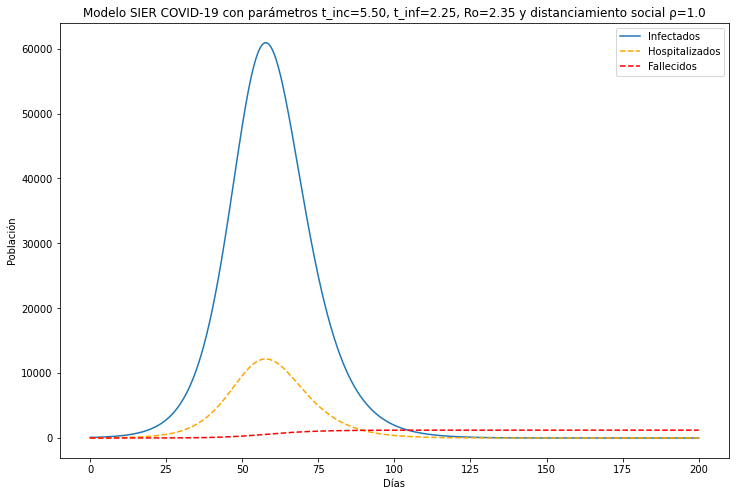

Para una población de 1000000 habitantes.
La máxima cantidad de infectados es 60914 que se alcanza a los 84 días desde el caso 100.
La cantidad de fallecidos es 1218.


In [8]:
# Plot results
plot_model(t, results, params, params_clinic)
infectados=np.max(results[:,2])
fallecidos=t_fallecido*infectados
print('Para una población de {p:.0f} habitantes.'.format(p=N))
print('La máxima cantidad de infectados es {c:.0f} que se alcanza a los {d:.0f} días desde el caso {i:.0f}.'.format(c=infectados, d=np.max(np.where(array>=casos))*dt, i=I0))
print('La cantidad de fallecidos es {d:.0f}.'.format(d=fallecidos))

Sin distanciamiento social (ρ=1) se produce un peak de infectados del 6% de la población. Es una infección severa aunque con duración de unos 100 días.

Considerando ahora el efecto de distanciamiento social, sea voluntario, cuarentena (caso las 7 comunas de Santiago), etc. Supongamos porcentaje de efectividad del 0%, 20% y 40%, es decir ρ = 1.0, 0.8 y 0.60.

In [0]:
# Corriendo diversos parámetros ρ
rho1 = 1.0
params = alpha, beta, gamma, rho1
results1 = seir_model_with_soc_dist(init_vals, params, t)

rho2 = 0.8
params = alpha, beta, gamma, rho2
results2 = seir_model_with_soc_dist(init_vals, params, t)

rho3 = 0.6
params = alpha, beta, gamma, rho3
results3 = seir_model_with_soc_dist(init_vals, params, t)

In [0]:
# Helper function for plotting
def plot_model_multiple(t, results1, results2, results3, params, params_clinic):
  plt.figure(figsize=(12,8))
  max_inf = np.max(results[:,2]) # total de infectados
  max_rec = np.max(results[:,3]) # total de removidos (recuperados + fallecidos)
  plt.plot(t, results1[:,2])
  plt.plot(t, results2[:,2])
  plt.plot(t, params_clinic[0]*results2[:,2], color='orange', linestyle='dashed') # Hospitalizados
  plt.plot(t, params_clinic[1]*results2[:,3]*max_inf/max_rec, color='red', linestyle='dashed') # Fallecidos
  plt.plot(t, results3[:,2])
  plt.ylabel('Población infectada')
  plt.xlabel('Días')
  plt.title(r'Modelo SIER COVID-19 con parámetros t_inc={a:.2f}, t_inf={c:.2f}, Ro={r:.2f} y distanciamiento social ρ.'
    .format(a=1/params[0],c=1/params[2],r=params[1]/params[2]))
  plt.legend(['ρ=1.0','ρ=0.8','hospitalizados','fallecidos','ρ=0.6'])
  plt.show()

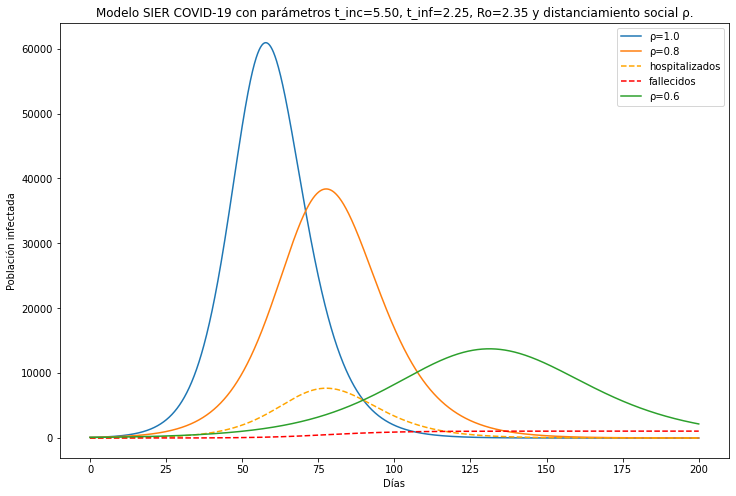

Para una población de 1000000 habitantes. Con distanciamiento social ρ=0.80.
La máxima cantidad de infectados es 38380 que se alcanza a los 84 días desde el caso 100.
La cantidad de fallecidos es 768.


In [11]:
# Plot results
plot_model_multiple(t, results1, results2, results3, params, params_clinic)
infectados=np.max(results2[:,2])
fallecidos=t_fallecido*infectados
print('Para una población de {p:.0f} habitantes. Con distanciamiento social ρ={r:.2f}.'.format(p=N, r=rho2))
print('La máxima cantidad de infectados es {c:.0f} que se alcanza a los {d:.0f} días desde el caso {i:.0f}.'.format(c=infectados, d=np.max(np.where(array>=casos))*dt, i=I0))
print('La cantidad de fallecidos es {d:.0f}.'.format(d=fallecidos))

Vemos el efecto de aplanamiento de la curva para las personas infectadas y el período de días en que ocurre. Se puede bajar de un peak del 6% a 4% de la población considerando factor de aislación de 0.8, a la vez que da más tiempo a prepararse para enfrentar el peak.

### Gráfico que muestra las cuatro variables del modelo SEIR

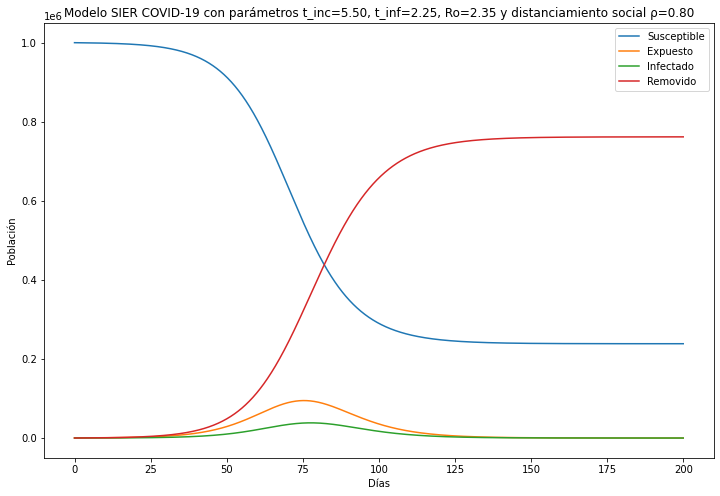

In [12]:
plt.figure(figsize=(12,8))
plt.plot(t, results2)
plt.legend(['Susceptible', 'Expuesto', 'Infectado', 'Removido'])
plt.ylabel('Población')
plt.xlabel('Días')
plt.title(r'Modelo SIER COVID-19 con parámetros t_inc={a:.2f}, t_inf={c:.2f}, Ro={r:.2f} y distanciamiento social ρ={p:.2f}'
  .format(a=1/params[0],c=1/params[2],p=rho2,r=params[1]/params[2]))
plt.show()

## Referencias

El estudio [Feasibility of controlling COVID-19 outbreaks by isolation of cases and contacts](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext) (Hellewell et al. 2020) estima incubación de 5 días y $R_0$ de 3.5.

Del paper [Epidemic analysis of COVID-19 in China by dynamical modeling](https://arxiv.org/pdf/2002.06563.pdf) (que usa una generalización del modelo SEIR) estiman un valor para $t_{infeccioso}$ de 2 días, entonces γ = 0.5.


Un simulador más completo en este sitio de [Gabriel Goh](http://gabgoh.github.io/COVID), Con los mismos parámetros indicados, pero con intervención del 50% (i.e. $R_t = \frac{1}{2}R_0$) se obtiene estos [resultados](http://gabgoh.github.io/COVID/?CFR=0.02&D_hospital_lag=5.0&D_incbation=5.5&D_infectious=2.25&D_recovery_mild=8.0&D_recovery_severe=12.0&I0=1&InterventionAmt=0.5&InterventionTime=60&P_SEVERE=0.46&R0=2.35&Time_to_death=20.0&logN=14.11).

Simulador de [isee system](https://exchange.iseesystems.com/public/isee/covid-19-simulator/index.html), probablemente el más completo disponible públicamente. Incluye un análisis What-If del COVID-19 según políticas epidémicas que se adopten. Se hace una explicación en el [webminar](https://www.iseesystems.com/resources/webinars/) "Modeling the COVID-19 Pandemic: A Primer and Overview", también disponible en [YouTube](https://youtu.be/XhywbOgMXe0).

Modelo SEIR para ébola en [Estimating the Reproduction Number of Ebola Virus](http://currents.plos.org/outbreaks/article/estimating-the-reproduction-number-of-zaire-ebolavirus-ebov-during-the-2014-outbreak-in-west-africa/).

## Artículos de Interés

"COVID-19 reports" publicado en MRC Centre for Global Infectious Disease Analysis, [Imperial College London](https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/news--wuhan-coronavirus/)

"Statement in support of the scientists, public health professionals, and medical professionals of China combatting COVID-19", publicado en [The Lancet](https://bit.ly/2ye4H3Y)

"A pneumonia outbreak associated with a new coronavirus of probable bat origin", publicado en [Nature](https://www.nature.com/articles/s41586-020-2012-7)

El programa [Stella](https://www.iseesystems.com/store/products/) es una suite completa para el modelamiento con versiones desktop y [on-line](https://exchange.iseesystems.com/). Se ofrece una versión trial completamente funcional para desktop y una versión on-line gratuita limitada.

El sitio [Insight Maker](https://insightmaker.com/) permite modelar estas ecuaciones en forma gráfica y facilita construir modelos complejos de manera simple online y gratuito.